# Diagnosing Hypothyroid disease using Machine learning 

Hypothyroidism, also called underactive thyroid disease, is a common disorder. With hypothyroidism, your thyroid gland does not make enough thyroid hormone.
The thyroid gland is located in the front lower part of your neck. Hormones released by the gland travel through your bloodstream and affect nearly every part of your body, from your heart and brain, to your muscles and skin. Applying machine learning algorithms can help assist healthcare workers in identifying signs and symptoms based on patterns shown in past cases of patients data.

In this notebooks, we will be learning the code and workflow for diagnosing whether or not a person is suffering from Hypothyroid disease based on various metrics.

## Importing libraries

1-importing the necessary libraries in Python.

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle # For saving models
import matplotlib.pyplot as plt # For plotting figures
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# For building our model
import keras
from keras.models import Sequential
from keras.layers import Dense

## Exploring the Data

- We are dowonloading the hypothyroid data for training our model using pandas library
- The dataset contains the values of various hormone levels in various patients, as well as our target variable, whether the patient was hypothyroid or not.


In [75]:
# Load dataset from csv using pandas
dataset = pd.read_csv('hypothyroid.csv')
dataset.head()

,Unnamed: 0,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.2,y,57,y,1.28,y,44,n,?


In [76]:
dataset.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

The dataset contains several columns related to the patient such as 
-age
-gender
-if the person was on any kind of medication or not
-measure of different hormones such like T3, T4, FTI
-pregnant
-thyroid surgery
and many other features .. 

## Data Cleaning

after dowonload the dataset, we should clean and pre-processing data to prevent faults in our result

In [77]:
# change the first column name to "target"
dataset = dataset.rename(columns = {dataset.columns[0]:"target"})

In [78]:
# look at the count of data in target
dataset["target"].value_counts()

negative       3012
hypothyroid     151
Name: target, dtype: int64


hypothyroid = patient was diagnosed with hypothyroidism   ,  
nagative = hypothyroidism was not diagnosed

and the target value looks imbalanced , and this is a problem in machine learning 

In [79]:
# convert target values to 0 for negative and 1 for hypothyroid
dataset["target"] = dataset["target"].map({"negative":0,"hypothyroid":1})

we will count values in each columns 

In [80]:
print("Unique categories in the column 'pregnant'", dataset['pregnant'].unique())
print("Count of categories in the column 'pregnant' \n", dataset["pregnant"].value_counts())

Unique categories in the column 'pregnant' ['f' 't']
Count of categories in the column 'pregnant' 
 f    3100
t      63
Name: pregnant, dtype: int64


In [81]:
print("Unique categories in the column 'T3 measured'", dataset['T3_measured'].unique())
print("Count of categories in the column 'T3 measured' \n", dataset["T3_measured"].value_counts())

Unique categories in the column 'T3 measured' ['y' 'n']
Count of categories in the column 'T3 measured' 
 y    2468
n     695
Name: T3_measured, dtype: int64


In [82]:
print("Unique categories in the column 'Sex'", dataset['Sex'].unique())
print("Count of categories in the column 'Sex' \n", dataset["Sex"].value_counts())

Unique categories in the column 'Sex' ['M' 'F' '?']
Count of categories in the column 'Sex' 
 F    2182
M     908
?      73
Name: Sex, dtype: int64


then convert some columns in the dataset to binary data

In [83]:
# changing the categorical values into binary values
dataset = dataset.replace({'f':0,'t':1, 'y':1, 'n':0, 'M':0, 'F':1})

In [84]:
# Displaying the head of the dataset
dataset.head()

,target,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72,0,0,0,0,0,0,0,0,...,1,0.6,1,15,1,1.48,1,10,0,?
1,1,15,1,1,0,0,0,0,0,0,...,1,1.7,1,19,1,1.13,1,17,0,?
2,1,24,0,0,0,0,0,0,0,0,...,1,0.2,1,4,1,1,1,0,0,?
3,1,24,1,0,0,0,0,0,0,0,...,1,0.4,1,6,1,1.04,1,6,0,?
4,1,77,0,0,0,0,0,0,0,0,...,1,1.2,1,57,1,1.28,1,44,0,?


as we noticed, some features contain '?' values. So we will be changing them with NaN values to count them

In [85]:
# changing ? to "NAN"
dataset.replace(to_replace='?', inplace=True, value=np.NaN)

### Checking if there is any null values

In [86]:
# figure up the number of null values
dataset.isnull().sum()

target                          0
Age                           446
Sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

we can observe that the feature column "TBG" contains high number of null values. So, we will drop it from our data set 

In [87]:
# Dropping the TBG column , beacuse it contains high number of null values
dataset.drop('TBG', axis = 1, inplace=True)

### Converting columns into numeric values

To help us in performing statistical operations on the columns.

In [88]:
# Selecting columns with data type as 'object'
columns = dataset.columns[dataset.dtypes.eq('object')]

# Convert to numeric values
dataset[columns] = dataset[columns].apply(pd.to_numeric, errors='coerce')

In [89]:
# Viewing the informations 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target                     3163 non-null   int64  
 1   Age                        2717 non-null   float64
 2   Sex                        3090 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

### Visualize the patterns in data

now we will visualize the patterns in different features of the data using the `hist()` function

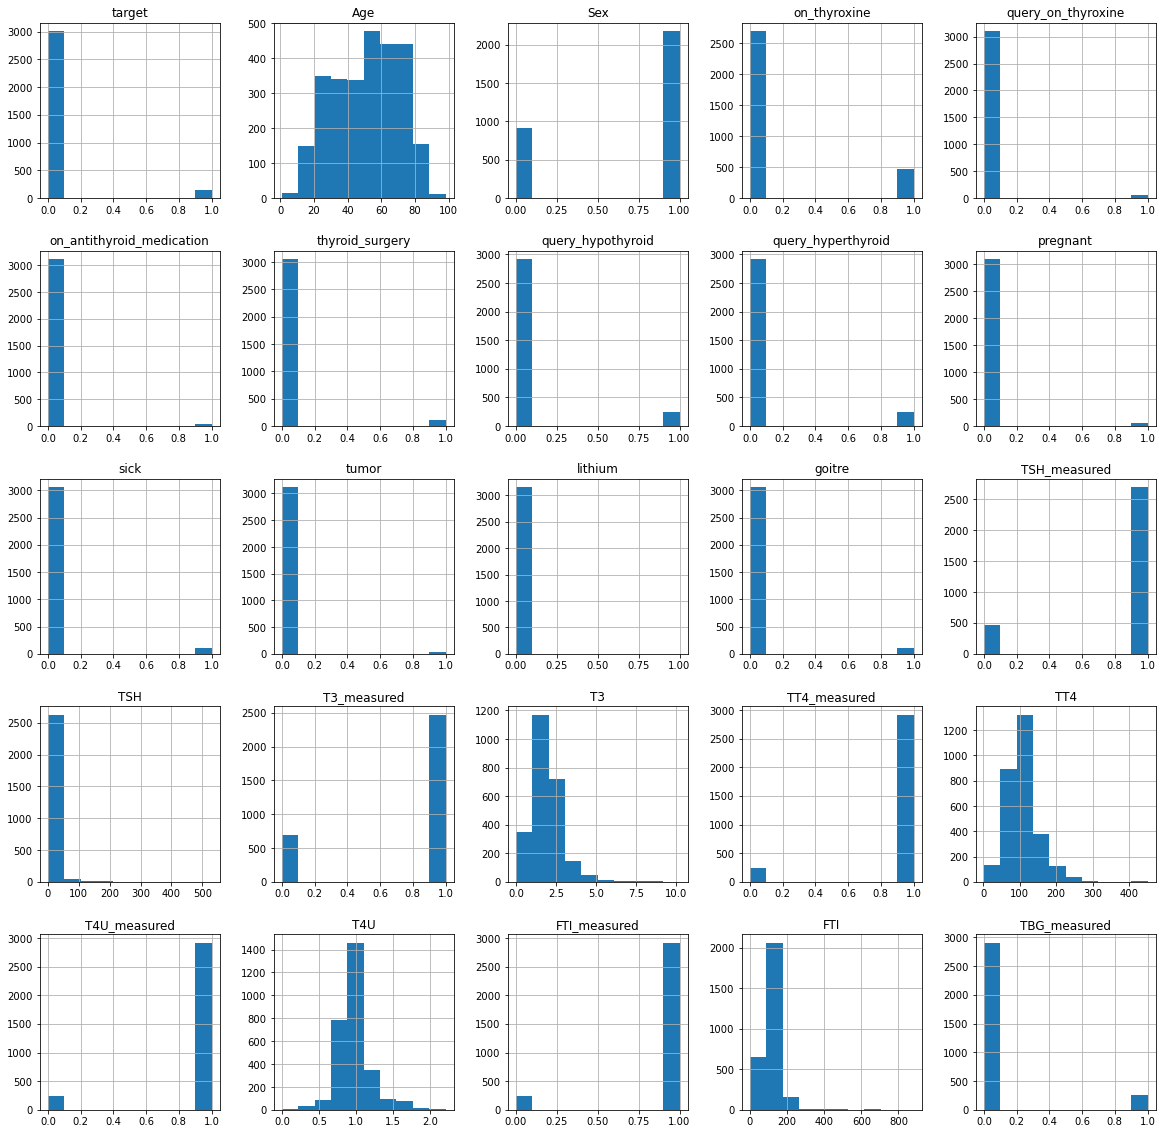

In [90]:
dataset.hist(figsize = (20,20));

### Replacing null values in our data

- We will impute the null values in our data with their appropriate statistical metric.

In [91]:
# Check the List of columns that containing null values
dataset.columns[dataset.isnull().any()].tolist() 

['Age', 'Sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

**Based on the statistics plotted above, we can see that,**

- The features "Age" and "T4U" show a normal distribution, which is why we will be replacing the missing values with mean.
- The features "TSH", "T3", "TT4" and "FTI" show a skewed distribution, which is why we will be replacing the missing values with median.
- The feature "gender" is binary and contains an imbalanced data with the values "1" much greater then "0". So we will be replacing the missing values with "0".

In [92]:
# Replacing Age and T4U null values by mean 
dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)
dataset['T4U'].fillna(dataset['T4U'].mean(), inplace = True)

# Replacing TSH, T3, TT4, FTI null values by median
dataset['TSH'].fillna(dataset['TSH'].mean(), inplace = True)
dataset['T3'].fillna(dataset['T3'].median(), inplace = True)
dataset['TT4'].fillna(dataset['TT4'].median(), inplace = True)
dataset['FTI'].fillna(dataset['FTI'].median(), inplace = True)

# The gender data looks to be imbalanced with 0 lesser than 1
# Replacing null values with 0
dataset['Sex'].fillna(0, inplace = True)

### Visualize the imputed data again to check if there is any missing value

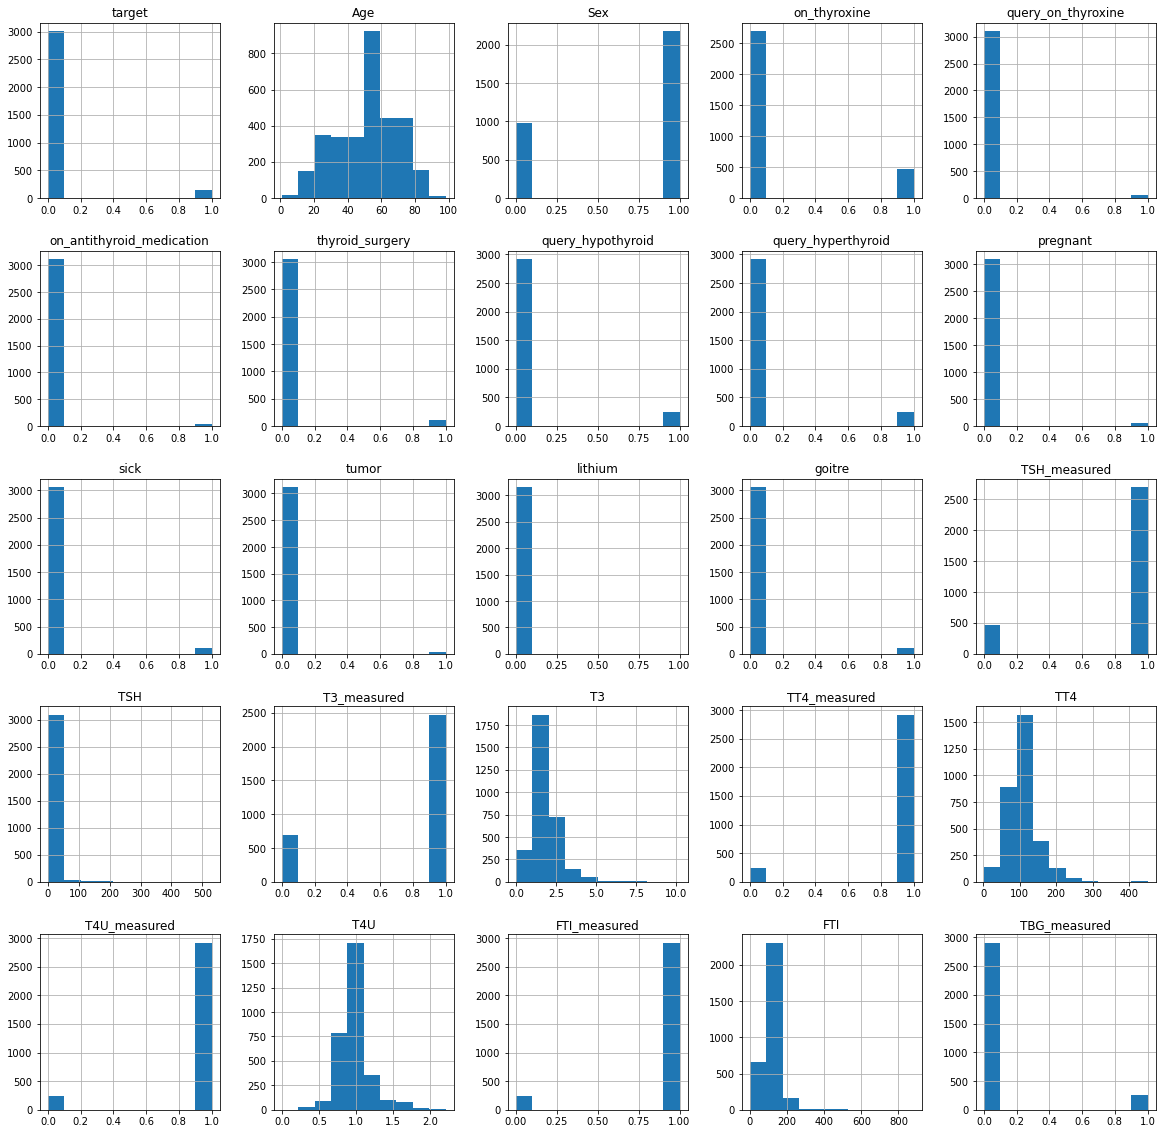

In [93]:
# Plot the histogram of different features
plot_cleaned = dataset.hist(figsize = (20,20))

### Checking for null values

We will again check the number of null values for each column.

In [94]:
# Check for the number of null values
dataset.isnull().sum()

target                       0
Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

---
## Modeling the data

after cleaned and formatted our data. We are now ready to model the data for prediction using neural network, decision tree and ensemble learning methods. We will be using these methods for predicting the **hypothyroidism (target)** based on our **input data (features).** 

### 1. Defining the features and target variables

We will be separating our dataset into features (X) and the target variable (y).

In [95]:
# Features (columns)
X = dataset.drop('target', axis = 1) # selecting all columns except the target
# Target variable
y = dataset['target']

In [96]:
print(X.shape, y.shape)

(3163, 24) (3163,)


### 2. Splitting the data into train (80%) and test (20%) data



In [97]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Scaling the train and test data 


So if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower

In [98]:
from sklearn.preprocessing import StandardScaler

# Initialization of the class
scaler = StandardScaler()

# Applying the scaler on test and train data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4. Building the neural network

Here, we are defining a neural network containing a sequential model with one hidden layer and one output layer. 
We have 24 feature columns due to which we have specified the input dimension as input_dim=24. We are using the ReLU activation function in the hidden layer, and sigmoid function for the output layer to return a binary value of output, i.e. hypothyroid (1) or negative (0).

In [99]:
# Input
model = Sequential()
# Hidden layer
model.add(Dense(64, kernel_initializer='uniform', input_dim=24, activation='relu'))
# Output layer
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

**Compiling the model with 'adam' optimizer and loss function as 'binary_crossentropy'.**

In [100]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 5. Training the model

We will now train the model with a validation split of 0.2 for 100 epochs.

In [101]:
# Training the model
result = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=40,  verbose=2)

Epoch 1/100
51/51 - 1s - loss: 0.5962 - accuracy: 0.9412 - val_loss: 0.4680 - val_accuracy: 0.9625
Epoch 2/100
51/51 - 0s - loss: 0.3287 - accuracy: 0.9580 - val_loss: 0.1946 - val_accuracy: 0.9644
Epoch 3/100
51/51 - 0s - loss: 0.1488 - accuracy: 0.9654 - val_loss: 0.0991 - val_accuracy: 0.9783
Epoch 4/100
51/51 - 0s - loss: 0.0935 - accuracy: 0.9713 - val_loss: 0.0714 - val_accuracy: 0.9842
Epoch 5/100
51/51 - 0s - loss: 0.0723 - accuracy: 0.9763 - val_loss: 0.0597 - val_accuracy: 0.9822
Epoch 6/100
51/51 - 0s - loss: 0.0622 - accuracy: 0.9797 - val_loss: 0.0533 - val_accuracy: 0.9842
Epoch 7/100
51/51 - 0s - loss: 0.0576 - accuracy: 0.9788 - val_loss: 0.0503 - val_accuracy: 0.9822
Epoch 8/100
51/51 - 0s - loss: 0.0535 - accuracy: 0.9817 - val_loss: 0.0473 - val_accuracy: 0.9822
Epoch 9/100
51/51 - 0s - loss: 0.0507 - accuracy: 0.9822 - val_loss: 0.0449 - val_accuracy: 0.9822
Epoch 10/100
51/51 - 0s - loss: 0.0484 - accuracy: 0.9807 - val_loss: 0.0440 - val_accuracy: 0.9802
Epoch 11/

### 6. Evaluating the model using accuracy and f1 score

We will now evaluate the performance of our trained model on test data to find metrics such as Accuracy, F1-score, recall, and precision.

**Accuracy**

In [102]:
# Get the loss and accuracy of the model by evaluation
loss, acc = model.evaluate(X_test, y_test)

# Print the loss and accuracy score for the model
print("%s: %.2f%%" % (model.metrics_names[0], loss*100))
print("%s: %.2f%%" % (model.metrics_names[1], acc*100))

20/20 [==============================] - 0s 573us/step - loss: 0.0634 - accuracy: 0.9795
loss: 6.34%
accuracy: 97.95%


We are getting a quite good accuracy of **98.42%** from our neural network model. However, our data is imbalanced and hence accuracy is not a good measure. Hence, we will be using a metric called F1-score

**F1-score, Recall, Precision**

In [103]:
# Predicting the output predictions
y_pred = model.predict(X_test).round()

In [104]:
# Calculating the F1 score, recall, and precision
print("%s: %.2f%%" % ("F1-score", f1_score(y_test, y_pred)*100))
print("%s: %.2f%%" % ("Recall", recall_score(y_test, y_pred)*100))
print("%s: %.2f%%" % ("Precision", precision_score(y_test, y_pred)*100))

F1-score: 81.69%
Recall: 78.38%
Precision: 85.29%


We are getting a quite good value of F1-score, recall and precision as well

**Training and validation loss**

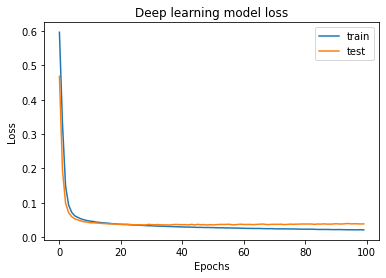

In [105]:
# summarize the result and plot the training and test loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

# Set the parameters
plt.title('Deep learning model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')

# Display the plots
plt.show()

We can see that both the losses have converged at a very good rate.

### 7. Building the Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(random_state=10)
rf_model.fit(X_train,y_train)
y_pred_rf= rf_model.predict(X_test)

### 8. Evaluating the model using accuracy and f1 score

In [107]:
#view accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rf)

0.985781990521327

In [108]:
#view F1-score
f1_rf= f1_score(y_test,y_pred_rf)
f1_rf

0.8656716417910447

### 9. Building the decision tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier 
dt_model= DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train,y_train)
y_pred_dt= dt_model.predict(X_test)

### 10. Evaluating the model using accuracy and f1 score

In [110]:
#view accuracy score
accuracy_score(y_test,y_pred_dt)

0.985781990521327

In [111]:
f1_dt= f1_score(y_test,y_pred_dt)
f1_dt

0.8695652173913043

### 11. Model Tuning

The best model based on the F1-score is decision tree . now , we will fine tune the cosen model use grid search with at least one important parameter tuned with atleast 3 diffrent values

In [112]:
#import 'Grid search' and other metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, fbeta_score

#create parameters list
parameters = {
    "criterion":['gini','entropy'],
    "max_depth":[1,2,3,4,5,6,7,None]
}
f1=make_scorer(f1_score)
grid=GridSearchCV(dt_model, param_grid= parameters, cv=10, n_jobs=-1, scoring= "f1")

grid.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]},
             scoring='f1')

In [113]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

In [114]:
best_pred=grid.predict(X_test)

In [115]:
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_pred)))

Final accuracy score on the testing data: 0.9937


In [116]:
print("Final F1-score on the testing data: {:.4f}".format(f1_score(y_test, best_pred)))

Final F1-score on the testing data: 0.9444


In [117]:
#accuracy for cross validation
grid.best_score_

0.919686950730429